# Lancio della sfera

## Inizializzazione
Librerie e variabili necessarie

In [15]:
from math import pi, sin, cos, sqrt
import matplotlib.pyplot as plt

In [16]:
# unità di misura
mm = 0.001
deg = pi/180

## Dati del problema

In [17]:
# dati del problema
d = 100 * mm  # diametro della sfera
rho = 7.85e3  # densità materiale sfera
g = 9.81 # acceler. gravità

In [18]:
# massa della sfera
m = 4/3 * (d/2)**3 * rho
print("Massa della sfera: " + str(m))

Massa della sfera: 1.3083333333333336


Forza dei resistenza dell'aria (drag):

$\textbf{F}_d = - \frac{1}{2} \, \rho_{air} |v|^2 c_d A \hat{\textbf{v}}$



In [35]:
A = d**2/4 * pi
A/mm**2
c_d = 1
rho_air = 1.3

In [36]:
def drag_force(vx, vz, A, c_dump, rho_fluid=1000):
  v_mag = sqrt(vx**2 + vz**2)
  F_mag = -0.5 * rho_fluid * v_mag**2 * c_dump * A
  # (vx, vz) / v_mag
  F_x = F_mag * vx/v_mag
  F_z = F_mag * vz/v_mag
  return F_x, F_z

In [37]:
x0, z0 = 0, 0
z_floor = x0
v_lancio = 5
angolo_lancio = 60 * deg

In [38]:
acc_z = -g
acc_x = 0

In [39]:
vz0 = v_lancio * sin(angolo_lancio)
vx0 = v_lancio * cos(angolo_lancio)
print(vx0, vz0)

2.5000000000000004 4.330127018922193


## Soluzione del sistema dinamico

In [40]:
t_end = 5
n = 10000
dt = t_end / n
dt

0.0005

In [41]:
# inizializzazione del primo passo
vx, vz = vx0, vz0
x = [None] * n
z = [None] * n
x[0] = x0
z[0] = z0
i_stop = None

# ciclo di integrazione
for i in range(1,n):
  f_drag_x, f_drag_z = drag_force(vx, vz, A, c_d, rho_air)
  # f_drag_x, f_drag_z = drag_force(vx=vx, vz=vz, A=A, c_dump=c_d, rho_fluid=rho_air)
  vx = vx + (acc_x + f_drag_x/m) * dt
  vz = vz + (acc_z + f_drag_z/m) * dt
  x[i] = x[i-1] + vx * dt
  z[i] = z[i-1] + vz * dt
  if z[i] <= z_floor:
    i_stop = i
    break


if i_stop == None:
  print("La simulazione è terminata senza raggiungere la quota del pavimento")
else:
  print("Il corpo ha raggiunto il pavimento al ciclo " + str(i_stop) + "-esimo")

Il corpo ha raggiunto il pavimento al ciclo 1761-esimo


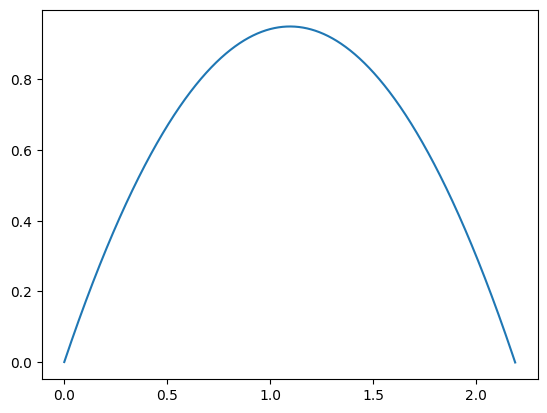

In [42]:
plt.plot(x[:i_stop+1], z[:i_stop+1])

In [43]:
def gittata(angolo_lancio, v_lancio, c_d):
  # inizializzazione del primo passo
  vz0 = v_lancio * sin(angolo_lancio)
  vx0 = v_lancio * cos(angolo_lancio)
  vx, vz = vx0, vz0
  x = [None] * n
  z = [None] * n
  x[0] = x0
  z[0] = z0
  i_stop = None

  # ciclo di integrazione
  for i in range(1,n):
    f_drag_x, f_drag_z = drag_force(vx, vz, A, c_d, rho_air)
    # f_drag_x, f_drag_z = drag_force(vx=vx, vz=vz, A=A, c_dump=c_d, rho_fluid=rho_air)
    vx = vx + (acc_x + f_drag_x/m) * dt
    vz = vz + (acc_z + f_drag_z/m) * dt
    x[i] = x[i-1] + vx * dt
    z[i] = z[i-1] + vz * dt
    if z[i] <= z_floor:
      i_stop = i
      break


  if i_stop == None:
    print("La simulazione è terminata senza raggiungere la quota del pavimento")
    return None
  else:
    print("Il corpo ha raggiunto il pavimento al ciclo " + str(i_stop) + "-esimo")
    return x[i_stop] - x0

In [44]:
gittata(60 * deg, 5, 1)

Il corpo ha raggiunto il pavimento al ciclo 1761-esimo


2.18828234928414

In [47]:
# n_alzate = 91
# alzate = [None] * n_alzate
# for i in range(n_alzate):
#   alzate[i] = i * deg

alzate = [i*deg for i in range(91)]

In [59]:
gittate = [gittata(alzata, 5, 100) for alzata in alzate]

Il corpo ha raggiunto il pavimento al ciclo 1-esimo
Il corpo ha raggiunto il pavimento al ciclo 35-esimo
Il corpo ha raggiunto il pavimento al ciclo 70-esimo
Il corpo ha raggiunto il pavimento al ciclo 104-esimo
Il corpo ha raggiunto il pavimento al ciclo 138-esimo
Il corpo ha raggiunto il pavimento al ciclo 172-esimo
Il corpo ha raggiunto il pavimento al ciclo 206-esimo
Il corpo ha raggiunto il pavimento al ciclo 239-esimo
Il corpo ha raggiunto il pavimento al ciclo 271-esimo
Il corpo ha raggiunto il pavimento al ciclo 303-esimo
Il corpo ha raggiunto il pavimento al ciclo 335-esimo
Il corpo ha raggiunto il pavimento al ciclo 367-esimo
Il corpo ha raggiunto il pavimento al ciclo 398-esimo
Il corpo ha raggiunto il pavimento al ciclo 428-esimo
Il corpo ha raggiunto il pavimento al ciclo 459-esimo
Il corpo ha raggiunto il pavimento al ciclo 489-esimo
Il corpo ha raggiunto il pavimento al ciclo 518-esimo
Il corpo ha raggiunto il pavimento al ciclo 548-esimo
Il corpo ha raggiunto il pavimen

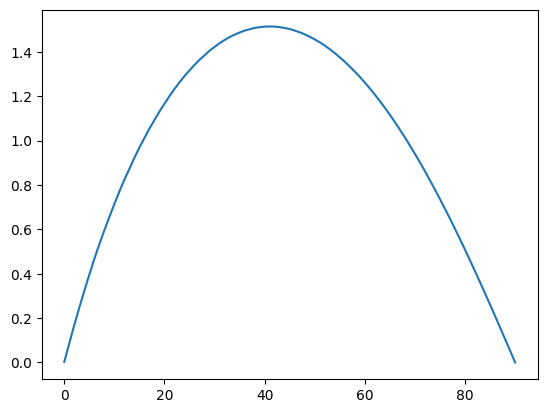

In [60]:
plt.plot([alzata/deg for alzata in alzate], gittate)

In [61]:
gittata_max = max(gittate)
indice_gittata_max = gittate.index(gittata_max)
alzate[indice_gittata_max]/deg

41.0